In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import locale
#import math
#%matplotlib inline

import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [48]:
# загружаем файл и поворачиваем
data = pd.read_csv('sale.csv') 
tr = data.T.copy()
tr = tr.reset_index()
# удаляем лишнее и выбираем только строчки с цифрами по месяцам
del tr[0]
del tr[1]
table_sum = tr.loc[3:81:2].reset_index(drop = True)

#меняем название столбцов
table_sum = table_sum.rename(columns = {'index' : 'data', 2: 'sum'})
table_sum['data']= pd.to_datetime(table_sum['data'], format='%d.%m.%Y')
table_sum['sum'] = table_sum['sum'] .astype(int)
#print(table_sum.info())
table_sum['sum'] = (table_sum['sum']/1000).round(-2)
# надо создать столбец год и месяц
table_sum['month'] = pd.DatetimeIndex(table_sum['data']).month
table_sum['year'] = pd.DatetimeIndex(table_sum['data']).year
table_sum['sum'] = table_sum['sum'] .astype(int)

# создадим столбец с количеством номенклатуры
table_count = tr.loc[4:82:2].reset_index(drop = True)
table_count = table_count.rename(columns = {2: 'sum'})
table_count['month'] = table_sum['month'] 
table_count['year'] =table_sum['year']
del table_count['index']
table_count = table_count.astype(int)

In [111]:
#создадим русские названия месяцев
a = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
table_sum['month_name'] = table_sum['month'].apply(lambda x: a[x-1])
def mont(table):
    table['month'] = table['month'].apply(lambda x: a[x-1])
    return table

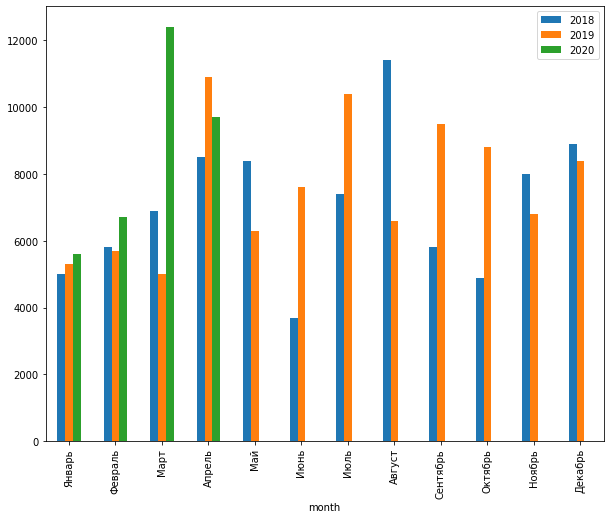

In [50]:
# построим гистограмму объединенную для наших данных по годам
x2017 = list(table_sum[table_sum['year'] == 2017]['sum'])
x2018 = list(table_sum[table_sum['year'] == 2018]['sum'])
x2019 = list(table_sum[table_sum['year'] == 2019]['sum'])
x2020 = list(table_sum[table_sum['year'] == 2020]['sum'])
for i in range(0, 8):
    x2020.append(0)
# создадим таблицу
new = pd.DataFrame()
new['month'] = a
#new['2017'] = x2017
new['2018'] = x2018
new['2019'] = x2019
#new['2020'] = 'NaN'
new['2020'] = x2020

new.plot.bar(x = 'month',figsize=(10,8))


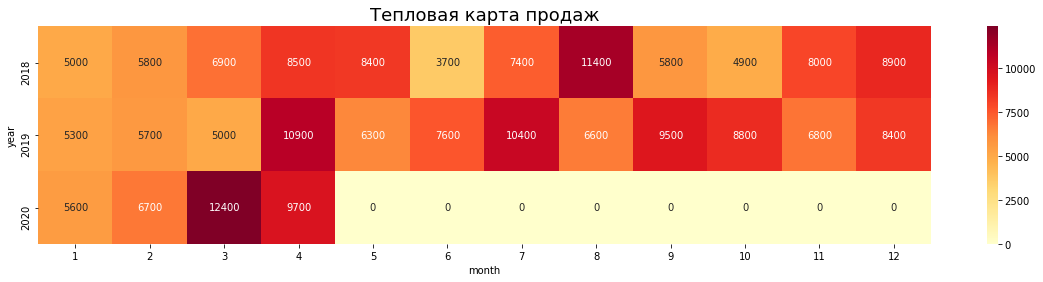

In [74]:
# тепловая карта по годам
hot_table = table_sum.query('year >2017').pivot_table(index = 'year', values = 'sum', columns = 'month').fillna(0)
plt.figure(figsize = (20,4))
sns.heatmap(hot_table, cmap = 'YlOrRd', annot = True, fmt = ".0f")
plt.title('Тепловая карта продаж').set_fontsize('18')

In [137]:
# сформируем срез по 2 условиям  делаем группировку и удаляем мультииндек и заменяем месяца на названия
table_sum[(table_sum['year'] >= 2018)& (table_sum['sum'] > table_sum['sum'].median())].\
        groupby(['year','month'])['sum'].sum().reset_index().\
        pipe(mont)
#table_sum[['year', 'sum']]

,year,month,sum
0,2018,Апрель,8500
1,2018,Август,11400
2,2018,Декабрь,8900
3,2019,Апрель,10900
4,2019,Июль,10400
5,2019,Сентябрь,9500
6,2019,Октябрь,8800
7,2020,Март,12400
8,2020,Апрель,9700


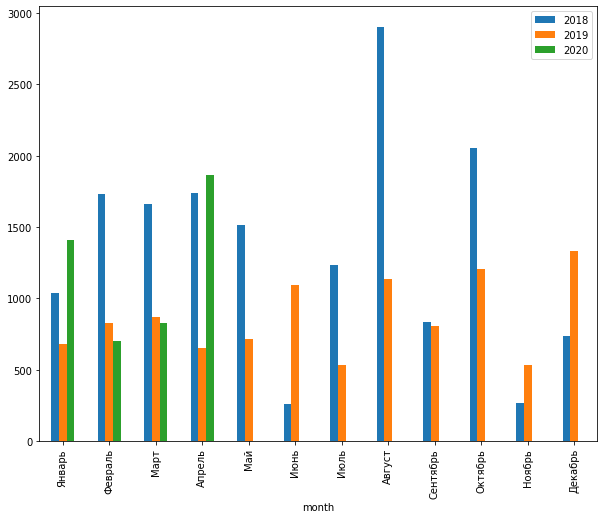

In [52]:
# построим гистограмму объединенную для наших данных по годам
y2017 = list(table_count[table_count['year'] == 2017]['sum'])
y2018 = list(table_count[table_count['year'] == 2018]['sum'])
y2019 = list(table_count[table_count['year'] == 2019]['sum'])
y2020 = list(table_count[table_count['year'] == 2020]['sum'])
for i in range(0, 8):
    y2020.append(0)
# создадим таблицу
new_count = pd.DataFrame()
#new_count['2017'] = x2017
new_count['2018'] = y2018
new_count['2019'] = y2019
#new_count['2020'] = 'NaN'
new_count['2020'] = y2020

new_count = new_count.astype(int)
new_count['month'] = a
new_count.plot.bar(x = 'month',figsize=(10,8))

In [53]:
# посмотрим данные за 4 месяца каждого года по количеству продаж
print(new.loc[:3:].describe())

# посмотрим данные за 4 месяца каждого года по количеству номенклатуры
print(new_count.loc[:3:].describe())

          2018      2019      2020
count    4.000     4.000     4.000
mean  6550.000  6725.000  8600.000
std   1515.476  2798.065  3069.202
min   5000.000  5000.000  5600.000
25%   5600.000  5225.000  6425.000
50%   6350.000  5500.000  8200.000
75%   7300.000  7000.000 10375.000
max   8500.000 10900.000 12400.000
          2018    2019     2020
count    4.000   4.000    4.000
mean  1541.750 757.750 1201.750
std    339.823 107.432  538.456
min   1035.000 650.000  704.000
25%   1503.000 675.500  797.000
50%   1695.500 754.500 1119.500
75%   1734.250 836.750 1524.250
max   1741.000 872.000 1864.000


In [134]:
colorr = ['hsl(' + str(h) + '90%'+'30%)' for h in np.linspace(0,360,4)]
god = table_sum.groupby(['year']).agg(sum=('sum', 'sum')).reset_index()
plt.plot.bar(x = 'year', y = 'sum', data = god)
plt.show()


AttributeError: 'function' object has no attribute 'bar'

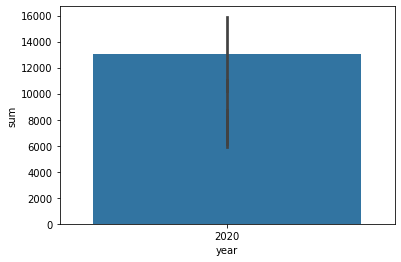

In [72]:
# сгенерим цвета для визуализации
categorii = table_sum['year'].unique().tolist()
colorr = ['hsl(' + str(h) + '50%'+'30%)' for h in np.linspace(0,360,4)]
for score in categorii:
    sns.barplot('year', 'sum', 
                data=table_sum.loc[table_sum.year==score, :], label=str(score))

Спарсим таблицу из сайта с кодами ИНН

In [54]:
import requests # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup
URL='http://riskam-net.ru/inn/'
req = requests.get(URL) # GET-запрос
soup = BeautifulSoup(req.text, 'lxml')
tsble = soup.find("table" ,attrs={"class":"MsoNormalTable"})
content=[] 
# создадим таблицу в которой не будет лишних переносов строки только данные с сайта
for row in tsble.find_all('tr'): 
     content.append([element.text.strip() for element in row.find_all('td')])
inn = pd.DataFrame(content, columns=[1,2]) 
inn

,1,2
0,Список регионов,Код региона
1,Республика Адыгея,1
2,Республика Башкортостан,"02, 102"
3,Республика Бурятия,3
4,Республика Алтай,4
...,...,...
82,Чукотский автономный округ,87
83,Ямало-Ненецкий автономный округ,89
84,Севастополь,92
85,Байконур,94


Inventory Turns / Оборачиваемость запасов
Все знают, как считать конверсию: количество товара, проданного в определённый период, надо разделить на количество товара на начало периода. Чем выше этот показатель, тем востребованнее продукты компании и тем привлекательнее компания для инвесторов. Для компаний, предоставляющих площадку для торговли (marketplace businesses), высокая конверсия означает, что поставщики и дальше будут работать с ней. Также инвесторам будет интересен рост конверсии — он особенно важен на ранних этапах и показывает развитие бизнеса.

У ритейлеров и производителей высокая конверсия указывает на то, что они способны правильно угадывать спрос и отвечать потребностям покупателей. Но для этих категорий бизнесов иногда важнее другой показатель — оборачиваемость запасов. Алгоритм вычисления следующий.

1) Надо выяснить среднюю стоимость запасов. Например, на начало года у вас было товаров на 100 000 рублей, а к концу — на 120 000 рублей. Обе цифры складываются и делятся на два — средняя стоимость запасов составляет 110 000 рублей.

2) Теперь высчитываем оборачиваемость запасов. Стоимость проданных за год товаров делится на среднюю стоимость запасов. Например, если вы продали товаров на 1,5 млн рублей, коэффициент оборачиваемости — 13. Чем выше цифра, тем эффективнее компания.

Если оборачиваемость со временем снижается, это плохой сигнал для инвесторов — либо падает спрос, либо компания не развивается. Есть два способа увеличить этот показатель и повысить привлекательность компании для инвесторов: более интенсивно продавать при том же количестве запасов или продавать так же, но снизить количество запасов, нужное для осуществления сделок.